In [10]:
#library import 
import numpy as np
from imageio import imread,imsave
import matplotlib.pyplot as plt

#pip install czifile
import czifile as czf



In [11]:
#jpeg or jpg image read, RGB individual separate and save 
img=imread('images/rgb.jpeg')

red_img= img * [1.,0.,0.]
green_img=img * [0.,1.,0.]
blue_img=img * [0.,0.,1.]

imsave('images/red_img.jpeg',red_img)
imsave('images/green_img.jpeg',green_img)
imsave('images/blue_img.jpeg',blue_img)

/var/folders/zp/kn2c7zks0q55p6_3s3c4b97h0000gn/T/ipykernel_42062/3921464618.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img=imread('images/rgb.jpeg')
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


In [12]:
#images min, max and mean calculation

from skimage import io, img_as_ubyte

img=img_as_ubyte(io.imread("images/monkey.jpg", as_gray=True))
print(img.shape, img.dtype)
print(img[10:20])

mean_grey=img.mean()
max_value=img.max()
min_value=img.min()

print("Min,Max and Mean are: ", min_value, max_value,mean_grey)

(1562, 920) uint8
[[186 186 186 ... 254 254 254]
 [188 188 188 ... 254 254 254]
 [189 189 189 ... 254 254 254]
 ...
 [192 192 192 ... 254 254 254]
 [192 193 193 ... 254 254 254]
 [194 194 195 ... 254 253 254]]
Min,Max and Mean are:  0 255 179.38468309859155


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 1, 3, 1104, 1376, 1)


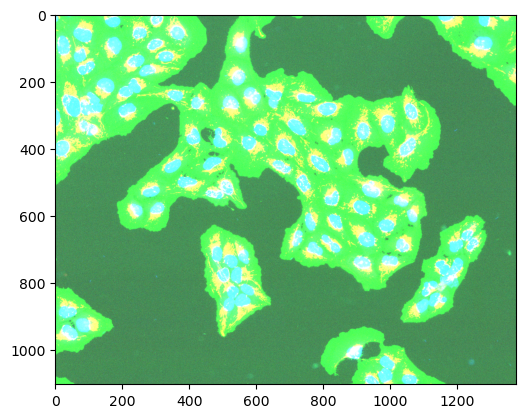

In [13]:
#.czi image read 
#a microscope image data file created in the Carl Zeiss CZI format

img=czf.imread("images/Osteosarcoma_01.czi")
print(img.shape)
# print(img)
channels=[]
for channel in range(3):
    channel_raster=img[0,0,channel,:,:,0]
#     print(channel)
#     print(channel_raster.shape)
    channels.append(channel_raster)
arr=np.stack(channels,axis=2)
plt.imshow(arr)

In [16]:
#.tif image read
#pip install apeer-ometiff-library
from apeer_ometiff_library import io

(pic2, omexml) = io.read_ometiff("images/Osteosarcoma_01.tif")
print(pic2.shape)

(1, 1104, 1, 1, 1376, 3)


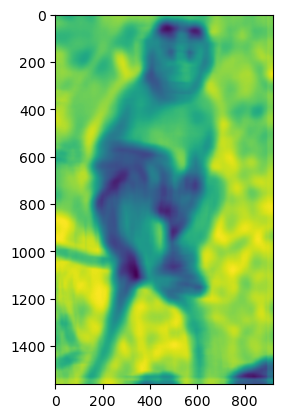

In [17]:
#image uniform filtering
from scipy import ndimage
from skimage import io, img_as_ubyte

img=img_as_ubyte(io.imread("images/monkey.jpg", as_gray=True))

uniform_filtered=ndimage.uniform_filter(img,size=50)

plt.imshow(uniform_filtered)
plt.show()